In [1]:
import blur
import matplotlib.pyplot as plt
%matplotlib notebook

File accessed:  hico_data/H2014064000912.L1B_ISS.nc


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


line: [[439 990 439 975]]
line: [[ 123 1078  123 1060]]
line: [[ 304 1456  304 1471]]
line: [[ 113 1114  113 1095]]
line: [[131 105 131  86]]
line: [[  58 1744   58 1729]]
line: [[ 77 849  77 833]]
line: [[  42 1516   42 1501]]
line: [[  10 1874   10 1856]]
line: [[  90 1716   90 1699]]
line: [[ 126 1103  126 1083]]
line: [[  59 1746   59 1726]]
line: [[   5 1871    5 1851]]
line: [[ 367 1319  367 1304]]
line: [[ 333 1317  333 1332]]
line: [[ 78 850  78 831]]
line: [[  85 1718   85 1700]]
line: [[230 914 230 930]]
line: [[369 814 369 831]]
line: [[ 137 1033  137 1014]]
line: [[   9 1873    9 1855]]
line: [[ 89 868  89 848]]
line: [[282 943 282 924]]


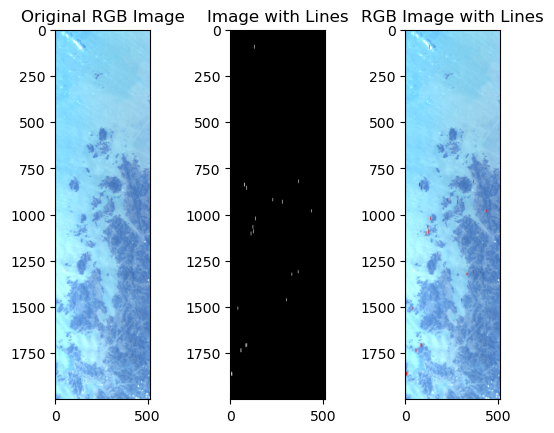

In [2]:
ba = blur.blurCube()

ba.get_cube()

ba.read_cube()

ba.visualize_cube()
